Load the qiskit and other relevant libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
import numpy as np
from qiskit.quantum_info import Statevector
from math import log
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from io import StringIO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import sklearn as sk
import matplotlib.colors
import sys

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


Import the Blobs dataset and convert it into pandas domain

In [3]:
rand = 0
num_features = 4
X,y = make_blobs(n_samples=10000, centers=[(-2.5,-2.5,-2.5,-2.5), (2.5,2.5,2.5,2.5)], n_features=4, random_state=rand)
df = pd.DataFrame(data= np.c_[X, y])

data = df.rename(columns={0: 'feature_1', 1: 'feature_2', 2:'feature_3', 3:'feature_4', 4:'target'})

#assert values to float type
data = data.astype(float)

In [4]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.003559,-0.004187,-0.011821,0.004453,0.500000
std,2.693008,2.682660,2.697344,2.692747,0.500025
min,-6.946632,-6.097163,-5.616857,-6.194285,0.000000
25%,-2.506003,-2.509109,-2.530928,-2.500753,0.000000
50%,-0.025108,-0.035691,-0.035524,-0.033291,0.500000
75%,2.508091,2.493922,2.505977,2.512343,1.000000
max,6.331790,6.202938,6.009223,6.136102,1.000000


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  10000 non-null  float64
 1   feature_2  10000 non-null  float64
 2   feature_3  10000 non-null  float64
 3   feature_4  10000 non-null  float64
 4   target     10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


Do the stratified shuffle split of the data into train and test with an 80/20 split such that the proportion of 1s and 0s of the y vector is the same across train and test set. This is crucial to maintain the same distribution of train and test.  

In [6]:
train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=rand)
print(train)

      feature_1  feature_2  feature_3  feature_4  target
1181  -0.719131  -0.598312  -2.821857  -2.704368     0.0
9581   3.518174   1.401293   1.330437   3.945736     1.0
1178   4.952137   1.579945   2.740331   2.519868     1.0
1040  -3.330848  -4.434611  -3.075452  -2.241756     0.0
1233  -2.411145  -2.145061  -1.811478  -2.470071     0.0
...         ...        ...        ...        ...     ...
3863   1.548118   0.774866   3.491478   1.514456     1.0
5297   2.068461   3.060725   2.104137   2.918533     1.0
1380  -1.992761  -2.616230  -3.447489  -2.255557     0.0
5186   2.889509   2.136980   1.738902   1.105287     1.0
6459  -1.710682  -1.674679  -2.621634  -1.664195     0.0

[8000 rows x 5 columns]


In [7]:
print(test)

      feature_1  feature_2  feature_3  feature_4  target
3756   1.674432   2.530149   3.672609   3.054769     1.0
1729  -2.050831  -2.631302  -3.250935  -1.222348     0.0
1455   2.454362   1.877183   2.163808   2.034453     1.0
1496  -2.899500  -2.800573  -2.278363  -2.720489     0.0
3559  -1.624361  -1.873660  -2.771416   0.099941     0.0
...         ...        ...        ...        ...     ...
3964  -2.377988  -3.083812  -2.532496  -2.296064     0.0
4573   2.773170   1.433272   1.139382   2.121546     1.0
4950  -2.810886  -2.402600  -2.100954  -5.272593     0.0
7418  -1.756328  -2.534930  -4.060775  -6.194285     0.0
1342   1.991256   2.357584   3.623481   2.618662     1.0

[2000 rows x 5 columns]


In [8]:
X_train, y_train = train.iloc[:,0:4], train.iloc[:,4]
X_test, y_test = test.iloc[:,0:4], test.iloc[:,4]

In [9]:
X_train

,feature_1,feature_2,feature_3,feature_4
1181,-0.719131,-0.598312,-2.821857,-2.704368
9581,3.518174,1.401293,1.330437,3.945736
1178,4.952137,1.579945,2.740331,2.519868
1040,-3.330848,-4.434611,-3.075452,-2.241756
1233,-2.411145,-2.145061,-1.811478,-2.470071
...,...,...,...,...
3863,1.548118,0.774866,3.491478,1.514456
5297,2.068461,3.060725,2.104137,2.918533
1380,-1.992761,-2.616230,-3.447489,-2.255557
5186,2.889509,2.136980,1.738902,1.105287


In [10]:
y_train

1181    0.0
9581    1.0
1178    1.0
1040    0.0
1233    0.0
       ... 
3863    1.0
5297    1.0
1380    0.0
5186    1.0
6459    0.0
Name: target, Length: 8000, dtype: float64

Split the data further into target 0 and target 1 labels

In [11]:
x1_train = X_train[y_train == 0.0]
x2_train = X_train[y_train == 1.0]
x1_test = X_test[y_test == 0.0]
x2_test = X_test[y_test == 1.0]

ADAM optimizer function

In [13]:
from typing import Optional, Callable, Tuple, List
import os
import numpy as np
import csv
from qiskit.aqua import aqua_globals
from qiskit.aqua.components.optimizers import Optimizer, OptimizerSupportLevel



class ADAM(Optimizer):
    """Adam and AMSGRAD optimizers.
        This implementation is taken directly from Qiskit. Please see Qiskit optimiser documentation for details.
        """

    _OPTIONS = ['maxiter', 'tol', 'lr', 'beta_1', 'beta_2',
                'noise_factor', 'eps', 'amsgrad', 'snapshot_dir']

    def __init__(self,
                 maxiter: int = 10000,
                 tol: float = 1e-6,
                 lr: float = 1e-3,
                 beta_1: float = 0.9,
                 beta_2: float = 0.99,
                 noise_factor: float = 1e-8,
                 eps: float = 1e-10,
                 amsgrad: bool = False,
                 snapshot_dir: Optional[str] = None) -> None:

        super().__init__()
        for k, v in locals().items():
            if k in self._OPTIONS:
                self._options[k] = v
        self._maxiter = maxiter
        self._snapshot_dir = snapshot_dir
        self._tol = tol
        self._lr = lr
        self._beta_1 = beta_1
        self._beta_2 = beta_2
        self._noise_factor = noise_factor
        self._eps = eps
        self._amsgrad = amsgrad
        self.loss_list = []
        self.params = []
        # runtime variables
        self._t = 0  # time steps
        self._m = np.zeros(1)
        self._v = np.zeros(1)
        if self._amsgrad:
            self._v_eff = np.zeros(1)

        if self._snapshot_dir:

            with open(os.path.join(self._snapshot_dir, 'adam_params.csv'), mode='w') as csv_file:
                if self._amsgrad:
                    fieldnames = ['v', 'v_eff', 'm', 't']
                else:
                    fieldnames = ['v', 'm', 't']
                writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                writer.writeheader()

    def get_support_level(self):
        """ Return support level dictionary """
        return {
            'gradient': OptimizerSupportLevel.supported,
            'bounds': OptimizerSupportLevel.ignored,
            'initial_point': OptimizerSupportLevel.supported
        }

    def save_params(self, snapshot_dir: str) -> None:
        if self._amsgrad:
            with open(os.path.join(snapshot_dir, 'adam_params.csv'), mode='a') as csv_file:
                fieldnames = ['v', 'v_eff', 'm', 't']
                writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                writer.writerow({'v': self._v, 'v_eff': self._v_eff,
                                 'm': self._m, 't': self._t})
        else:
            with open(os.path.join(snapshot_dir, 'adam_params.csv'), mode='a') as csv_file:
                fieldnames = ['v', 'm', 't']
                writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                writer.writerow({'v': self._v, 'm': self._m, 't': self._t})

    def load_params(self, load_dir: str) -> None:

        with open(os.path.join(load_dir, 'adam_params.csv'), mode='r') as csv_file:
            if self._amsgrad:
                fieldnames = ['v', 'v_eff', 'm', 't']
            else:
                fieldnames = ['v', 'm', 't']
            reader = csv.DictReader(csv_file, fieldnames=fieldnames)
            for line in reader:
                v = line['v']
                if self._amsgrad:
                    v_eff = line['v_eff']
                m = line['m']
                t = line['t']

        v = v[1:-1]
        self._v = np.fromstring(v, dtype=float, sep=' ')
        if self._amsgrad:
            v_eff = v_eff[1:-1]
            self._v_eff = np.fromstring(v_eff, dtype=float, sep=' ')
        m = m[1:-1]
        self._m = np.fromstring(m, dtype=float, sep=' ')
        t = t[1:-1]
        self._t = np.fromstring(t, dtype=int, sep=' ')

    def minimize(self, objective_function: Callable[[np.ndarray], float], initial_point: np.ndarray,
                 gradient_function: Callable[[np.ndarray], float]) -> Tuple[np.ndarray, float, int]:

        derivative = gradient_function(initial_point)
        self._t = 0
        self._m = np.zeros(np.shape(derivative))
        self._v = np.zeros(np.shape(derivative))
        if self._amsgrad:
            self._v_eff = np.zeros(np.shape(derivative))
        self.loss_list = []
        self.params = []
        params = params_new = initial_point
        while self._t < self._maxiter:
            derivative = gradient_function(params)
            self._t += 1
            self._m = self._beta_1 * self._m + (1 - self._beta_1) * derivative
            self._v = self._beta_2 * self._v + (1 - self._beta_2) * derivative * derivative
            lr_eff = self._lr * np.sqrt(1 - self._beta_2 ** self._t) / (1 - self._beta_1 ** self._t)
            if not self._amsgrad:
                params_new = (params - lr_eff * self._m.flatten()
                              / (np.sqrt(self._v.flatten()) + self._noise_factor))
                self.params.append(params_new)
                self.loss_list.append(objective_function(params_new))
            else:
                self._v_eff = np.maximum(self._v_eff, self._v)
                params_new = (params - lr_eff * self._m.flatten()
                              / (np.sqrt(self._v_eff.flatten()) + self._noise_factor))
                self.params.append(params_new)
                self.loss_list.append(objective_function(params_new))
            if self._snapshot_dir:
                self.save_params(self._snapshot_dir)
            if np.linalg.norm(params - params_new) < self._tol:
                return params_new, objective_function(params_new), self._t
            else:
                params = params_new
        return params_new, objective_function(params_new), self._t

    def optimize(self, num_vars: int, objective_function: Callable[[np.ndarray], float],
                 gradient_function: Optional[Callable[[np.ndarray], float]] = None,
                 variable_bounds: Optional[List[Tuple[float, float]]] = None,
                 initial_point: Optional[np.ndarray] = None
                 ) -> Tuple[np.ndarray, float, int]:

        super().optimize(num_vars, objective_function, gradient_function,
                         variable_bounds, initial_point)
        if initial_point is None:
            initial_point = aqua_globals.random.random(num_vars)
        if gradient_function is None:
            gradient_function = Optimizer.wrap_function(Optimizer.gradient_num_diff,
                                                        (objective_function, self._eps))

        point, value, nfev = self.minimize(objective_function, initial_point, gradient_function)
        return point, value, nfev, self.loss_list, self.params

In [14]:
num_qubits = 4  
def final_circuit(circuit, data, params):
    layers = len(params) // num_qubits
    for i in range(num_qubits):
        circuit.h(i)
    for j in range(layers-1):
        for i in range(num_qubits):
            circuit.rz(data[i],i)
            circuit.ry(params[i+num_qubits*j], i)
        circuit.cx(0,3)
        circuit.cx(1,2)
        circuit.barrier()
    for i in range(num_qubits):
        circuit.rz(data[i],i)
        circuit.ry(params[i+num_qubits*(layers-1)], i)

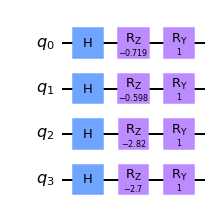

In [15]:
cir = QuantumCircuit(num_features)
final_circuit(cir, x1_train.values[0],[1,1,1,1])
cir.draw('mpl')

Various helper functions

In [16]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

In [17]:
def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
              class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

In [18]:
def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circuit = QuantumCircuit(n)
        circ_ = final_circuit(circuit, x, params)
        qc = sv.evolve(circuit)
        qc_list += [qc]
    probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs

In [19]:
def CrossEntropy(yHat, y):
    if y == 'A':
      return -log(yHat['A'])
    else:
      return -log(1-yHat['A'])

In [46]:
def cost_function(training_input, class_labels, params, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for label, samples in training_input.items():
        for sample in samples:
            training_labels += [label]
            training_samples += [sample]

    # classify all samples
    probs = classify(training_samples, params, class_labels)
    #print(probs)
    #k = 0
    #print(k)
    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += CrossEntropy(yHat=prob, y=training_labels[i])
    cost /= len(training_samples)
    # return objective value
    return cost

In [47]:
training_size = 8000
# dimension of data sets
n = 4
training_input = {'A':x1_train.values, 'B':x2_train.values}
test_input = {'A':x1_test.values, 'B':x2_test.values}
class_labels = ['A', 'B']
sv = Statevector.from_label('0' * n)

In [ ]:
# setup the optimizer
optimizer = ADAM(maxiter=100, lr=0.1)

# define objective function for training
objective_function = lambda params: cost_function(training_input, class_labels, params, print_value=True)

d = 4  # num of trainable params
np.random.seed(0)
# randomly initialize the parameters
init_params = np.random.uniform(-1,1,d)
#print(init_params)
opt_params, value, _, loss,params = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
#print(loss)
#print(opt_params)
# print results
f1 = 'quantum_loss_easy_layer_boot_1k.npy' 
f2 = 'opt_params_easy_layer_boot_1k.npy'
f3 = 'all_run_params_easy_boot_1k.npy'
np.save(f2, opt_params)
np.save(f1, loss)
np.save(f3, params)

In [29]:
def cost_function_test(test_input, class_labels, params, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    test_labels = []
    test_samples = []
    i = 0
    for label, samples in test_input.items():
        for sample in samples:
            test_labels += [label]
            test_samples += [sample]

    # classify all samples
    probs = classify(test_samples, params, class_labels)

    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += CrossEntropy(yHat=prob, y=test_labels[i])
    cost /= len(test_samples)

    return cost

In [30]:
test_loss = []
for i in range(len(params)):
    test_loss.append(cost_function_test(test_input, class_labels, params[i]))

In [31]:
f4 = 'test_loss_easy_layer_boot_1k.npy' 
np.save(f4, test_loss)

Text(0.5, 1.0, 'Easy Model, 1 Layer, Blobs, 10000 Samples (Stratified without Bootstraps)')

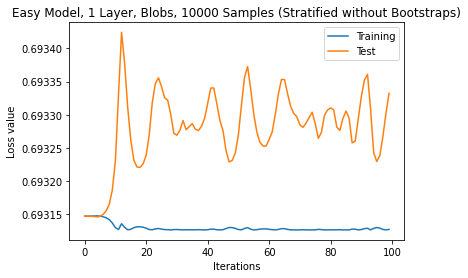

In [32]:
plt.plot(range(100), loss)
plt.plot(range(100), test_loss)

legendList = ['{}'.format(i) for i in ["Training", "Test"]]
plt.legend(legendList)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Easy Model, 1 Layer, Blobs, 10000 Samples (Stratified without Bootstraps)")

Implementing the Bootstraps of the test dataset with 100 bootstrapped iterations

In [33]:
num_bootstraps = 50
alpha = 0.05
prop_bootstrap = 0.7

def bootstrap_ci(test, strat_bycol, sample_proportion, n_bootstraps, stratified):
    test_loss_bootstrap = []
    
    #for i in range(n_bootstraps):
    #    test_loss_bootstrap.append([])
    
    for i in range(n_bootstraps):
        if stratified:
            df_strat = test.groupby(strat_bycol).apply(lambda x: x.sample(frac=sample_proportion))
        else:
            df_strat = test.sample(frac=sample_proportion)
        X_test, y_test = df_strat.iloc[:,0:4], df_strat.iloc[:,4]
        x1_test = X_test[y_test == 0.0]
        x2_test = X_test[y_test == 1.0]
        test_input = {'A':x1_test.values, 'B':x2_test.values}
        class_labels = ['A', 'B']
        sv = Statevector.from_label('0' * n)
        test_loss = []
        for i in range(len(params)):
            test_loss.append(cost_function_test(test_input, class_labels, params[i]))
        test_loss_bootstrap.append(test_loss)
    return test_loss_bootstrap        
        
test_loss_ci_strat = bootstrap_ci(test, 'target', prop_bootstrap, num_bootstraps, True)
#test_loss_ci_unstrat = bootstrap_ci(test, 'target', prop_bootstrap, num_bootstraps, False)

Find the element in the array closest the mean and use it as the index to plot the mean test loss behavior

In [34]:
transpose_test_strat = np.transpose(test_loss_ci_strat)
#}transpose_test_unstrat = np.transpose(test_loss_ci_unstrat)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

index_mean_strat = find_nearest(transpose_test_strat[10], np.mean(transpose_test_strat[10]))
index_max_strat = find_nearest(transpose_test_strat[10], np.max(transpose_test_strat[10]))
index_min_strat = find_nearest(transpose_test_strat[10], np.min(transpose_test_strat[10]))
#index_unstrat = find_nearest(transpose_test_unstrat[10], np.mean(transpose_test_unstrat[10]))

In [35]:
f4 = 'test_loss_strat_easy_layer_boot_1k.npy' 
np.save(f4, test_loss_ci_strat)

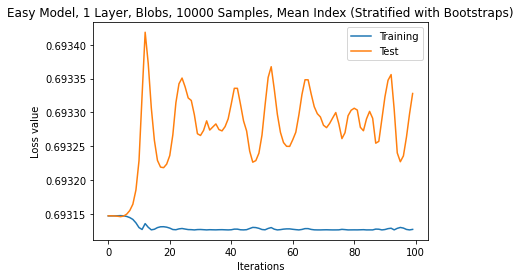

In [45]:
x = range(100)
y = loss

plt.plot(x,y)
plt.plot(x, test_loss_ci_strat[index_mean_strat])

legendList = ['{}'.format(i) for i in ["Training", "Test"]]
plt.legend(legendList)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Easy Model, 1 Layer, Blobs, 10000 Samples, Mean Index (Stratified with Bootstraps)")
plt.show()

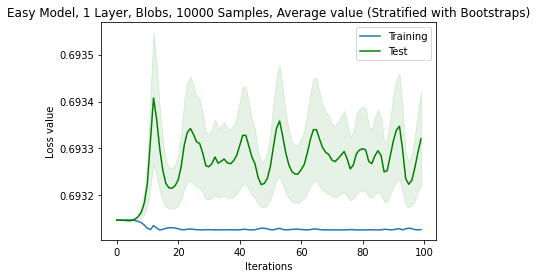

In [44]:
plt.plot(x,y)

sd = np.std(test_loss_ci_strat, axis=0)
av = np.average(test_loss_ci_strat, axis=0)
plt.plot(range(100), av, color='green')
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1, color='green')

legendList = ['{}'.format(i) for i in ["Training", "Test"]]
plt.legend(legendList)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Easy Model, 1 Layer, Blobs, 10000 Samples, Average value (Stratified with Bootstraps)")
plt.show()

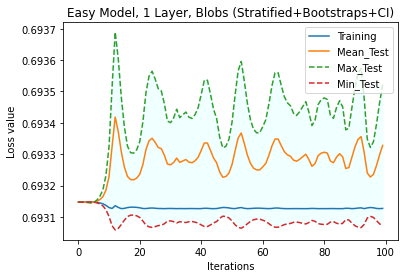

In [42]:
plt.plot(x,y)
plt.plot(x, test_loss_ci_strat[index_mean_strat])
plt.plot(x, test_loss_ci_strat[index_max_strat], '--')
plt.plot(x, test_loss_ci_strat[index_min_strat], '--')

legendList = ['{}'.format(i) for i in ["Training", "Mean_Test", "Max_Test","Min_Test"]]
plt.legend(legendList, loc = 1)

plt.fill_between(x, test_loss_ci_strat[index_max_strat], test_loss_ci_strat[index_min_strat], color='azure')
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Easy Model, 1 Layer, Blobs (Stratified+Bootstraps+CI)")
plt.show()

In [38]:
f4 = 'test_loss_mean_easy_layer_boot_1k.npy' 
np.save(f4, test_loss_ci_strat[index_mean_strat])